<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/main/Bandgaps_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing library and imports

In [1]:
# You might need to reinstall the library manually, imports ans pip install:
!pip install mp_api
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# Import
# from mp_api.client import MPRester
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
from pymatgen.core.structure import Structure
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
import time

# Example code

In [ ]:
with MPRester("VlQ1oWGAXlhWiKRkPOk5q1cP8dNS6mIu") as mpr:
  #Please edit features you want to filter from inside the search() command. for example:
  example_docs = mpr.materials.summary.search(band_gap=(.001, None), spacegroup_number = 217)


In [ ]:
for i in range(len(example_docs)):
    lattice = example_docs[i].structure.lattice
    bandgap = example_docs[i].band_gap
    plt.plot(lattice.gamma, bandgap, 'o')
plt.xlabel('lattice parameter a (Å)')
plt.ylabel('band gap (ev)')
plt.title(f'Band gap vs lattice parameter all materials')
plt.savefig("bandgap all.png")


### Download Data from API

This block in the notebook is for bookkeeping purposes only. Don't run this code, instead load the data from the JSON file directly.

In [ ]:
# Put your API key here
API_KEY = "INSERT_API_KEY"

# Configuration
n_zero_bandgap = 50   # number of zero bandgap materials to include in dataset
all_data_fields = ['builder_meta', 'nsites', 'elements', 'nelements',\
                   'composition', 'composition_reduced', 'formula_pretty',\
                   'formula_anonymous', 'chemsys', 'volume', 'density',\
                   'density_atomic', 'symmetry', 'property_name', 'material_id',\
                   'deprecated', 'deprecation_reasons', 'last_updated', 'origins',\
                   'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom',\
                   'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull',\
                   'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to',\
                   'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi',\
                   'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure',\
                   'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering',\
                   'total_magnetization', 'total_magnetization_normalized_vol',\
                   'total_magnetization_normalized_formula_units', 'num_magnetic_sites',\
                   'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus',\
                   'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson',\
                   'e_total', 'e_ionic', 'e_electronic', 'n', 'e_ij_max',\
                   'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',\
                   'weighted_work_function', 'surface_anisotropy', 'shape_factor',\
                   'has_reconstructed', 'possible_species', 'has_props',\
                   'theoretical', 'database_IDs'] # fields to include in the raw data dump when quering API
fields_to_include = [
    'material_id', 'formula_pretty', 'chemsys', 'elements', 'nelements',
    'nsites', 'volume', 'density', 'density_atomic', 'structure',
    'formation_energy_per_atom', 'energy_above_hull', 'band_gap', 'cbm', 'vbm',
    'is_gap_direct', 'is_metal', 'is_stable', 'efermi',
    'bulk_modulus', 'shear_modulus', 'total_magnetization', 'ordering', 'is_magnetic',
    'composition', 'composition_reduced', 'formula_anonymous', 'symmetry',
    'uncorrected_energy_per_atom', 'energy_per_atom', 'equilibrium_reaction_energy_per_atom',
    'decomposes_to', 'bandstructure', 'dos_energy_up', 'dos_energy_down',
    'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units',
    'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species',
    'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',
    'n', 'e_ij_max', 'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',
    'weighted_work_function', 'surface_anisotropy', 'shape_factor', 'has_reconstructed',
    'possible_species', 'theoretical'
]

In [ ]:
# Create raw dataset from API
materials_data = []

with MPRester(API_KEY) as mpr:
    # Query materials with non-zero band gap
    nonzero_docs = mpr.materials.summary.search(
        band_gap=(0.001, None),
        fields=fields_to_include,
        num_chunks=None,  # fetch all materials
        chunk_size=1000
    )
    print(f"Fetched {len(nonzero_docs)} materials with non-zero band gap.")

    # Query 50 materials with zero band gap
    zero_docs = mpr.materials.summary.search(
        band_gap=(0.0, 0.0),
        fields=fields_to_include,
        num_chunks=1,
        chunk_size=1000
    )
    print(f"Fetched {len(zero_docs)} materials with zero band gap.")

    # Combine both lists
    all_docs = list(nonzero_docs) + list(zero_docs)

    # Dynamically build dicts from specified fields
    for doc in all_docs:
        d = {}
        for field in fields_to_include:
            value = getattr(doc, field)
            if hasattr(value, "as_dict"):
                d[field] = value.as_dict()  # serialize Structure
            else:
                d[field] = value
        materials_data.append(d)

### Store Data in a JSON

In [ ]:
def clean_entry(entry):
    out = {}
    for k, v in entry.items():
        if isinstance(v, Element):
            out[k] = str(v)
        elif isinstance(v, list) and all(isinstance(i, Element) for i in v):
            out[k] = [str(e) for e in v]
        elif isinstance(v, Composition):
            out[k] = v.as_dict()
        elif hasattr(v, 'as_dict'):
            out[k] = v.as_dict()
        elif isinstance(v, (int, float, str, bool)) or v is None:
            out[k] = v
        elif isinstance(v, list):
            out[k] = [clean_entry(e) if isinstance(e, dict) else e for e in v]
        elif isinstance(v, dict):
            out[k] = clean_entry(v)
        else:
            # Skip unsupported objects
            continue
    return out

In [ ]:
# Cleaned data
cleaned_data = [clean_entry(m) for m in materials_data]
for entry in cleaned_data:
    entry.pop("decomposes_to", None)

In [ ]:
# Save to JSON file
with open("materials_data.json", "w") as f:
    json.dump(cleaned_data, f)

print(f"Saved {len(cleaned_data)} materials to materials_data.json")

# Data categorization and correlation

### Load data from JSON

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the JSON data
with open("/content/drive/MyDrive/Project Documents ML-CMT/materials_data.json") as f:
    materials_data = json.load(f)

### Build a tabular (processed) dataset

In [5]:
start = time.time()

# Build tabular dataset
records = []
for m in materials_data:
    struct = Structure.from_dict(m["structure"])
    elements = struct.species

    # electronegativity
    en_values = [Element(el).X for el in elements]
    min_en_values = np.min(en_values)
    max_en_values = np.max(en_values)

    #ie
    ie_values = [Element(el).ionization_energy for el in elements]
    min_ie_values = np.min(ie_values)
    max_ie_values = np.max(ie_values)

    #am
    am_values = [Element(el).atomic_mass for el in elements]
    min_am_values = np.min(am_values)
    max_am_values = np.max(am_values)

    #vdw
    vdw_values = [Element(el).van_der_waals_radius for el in elements]
    min_vdw_values = np.min(vdw_values)
    max_vdw_values = np.max(vdw_values)

    record = {
        "material_id": m["material_id"],
        "band_gap": m["band_gap"],
        "formula": m["formula_pretty"],
        "density": m["density"],
        "volume": m["volume"],
        "a": struct.lattice.a,
        "b": struct.lattice.b,
        "c": struct.lattice.c,
        "alpha": struct.lattice.alpha,
        "beta": struct.lattice.beta,
        "gamma": struct.lattice.gamma,
        "n_atoms": m["nsites"],
        "mean_distance": 0.0 if m["nsites"] == 1 else np.mean(struct.distance_matrix[0][1:]),
        "max_distance": np.max(struct.distance_matrix[0]),
        "min_distance": np.min(struct.distance_matrix[0]) if m["nsites"] == 1 else np.sort(struct.distance_matrix[0])[1], # taking second smallest distance, because distance to self is always 0
        "std_distance": 0.0 if m["nsites"] == 1 else np.std(struct.distance_matrix[0][1:]),
        "spacegroup_number " : struct.get_space_group_info()[1],

        #"electronegativities": en_data,
        "avg_en": np.mean(en_values),
        "en_range": max_en_values - min_en_values,
        "max_en": max_en_values,
        "min_en": min_en_values,
        "std_en": np.std(en_values),

        "avg_ie": np.mean(ie_values),
        "ie_range": max_ie_values - min_ie_values,
        "max_ie": max_ie_values,
        "min_ie": min_ie_values,
        "std_ie": np.std(ie_values),

        "avg_am": np.mean(am_values),
        "en_range": max_am_values - min_am_values,
        "max_am": max_am_values,
        "min_am": min_am_values,
        "std_am": np.std(am_values),

        "avg_vdw": np.mean(vdw_values),
        "vdw_range": max_vdw_values - min_vdw_values,
        "max_vdw": max_vdw_values,
        "min_vdw": min_vdw_values,
        "std_vdw": np.std(vdw_values),

        # Other values
        "vbm": m["vbm"],
        "cbm": m["cbm"],
        "bulk_modulus": m["bulk_modulus"],
        "shear_modulus": m["shear_modulus"],

    }
    records.append(record)

end = time.time()

print(f"Execution time: {end - start:.4f} seconds")

# df = pd.DataFrame(records)
# df.to_csv("bandgap_dataset.csv", index=False)

# print(f"Saved tabular dataset to bandgap_dataset.csv with shape {df.shape}")

<ipython-input-5-510f2f638365>:10: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]
<ipython-input-5-510f2f638365>:10: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]
<ipython-input-5-510f2f638365>:10: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]


Execution time: 918.1519 seconds


In [58]:
df = pd.DataFrame(records)
df.to_csv("bandgap_dataset_premium.csv", index=False)
print(f"Saved tabular dataset to bandgap_dataset.csv with shape {df.shape}")

Saved tabular dataset to bandgap_dataset.csv with shape (82998, 40)


In [ ]:
victor_feat = ["avg_en", "en_range", "max_en ",  "min_en", "std_en"]

In [ ]:
niko_feat = ["vbm", "cbm", "bulk_modulus", "shear_modulus"]

In [ ]:
elements = set(struct.species)

In [ ]:
m

{'material_id': 'mp-1228947',
 'formula_pretty': 'AlAg4',
 'chemsys': 'Ag-Al',
 'elements': ['Ag', 'Al'],
 'nelements': 2,
 'nsites': 5,
 'volume': 87.7937743123103,
 'density': 8.671245147627953,
 'density_atomic': 17.55875486246206,
 'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[11.712989, -1.472910999999999, 0.0],
    [11.712989, 1.472910999999999, 0.0],
    [11.52777, 0.0, 2.5444240000000002]],
   'a': 11.805235200030621,
   'b': 11.805235200030621,
   'c': 11.805235053342903,
   'alpha': 14.334671057232613,
   'beta': 14.334671057232613,
   'gamma': 14.33467169172179,
   'volume': 87.79377431231025},
  'sites': [{'species': [{'element': 'Al', 'occu': 1}],
    'abc': [0.0, 0.0, 0.0],
    'xyz': [0.0, 0.0, 0.0],
    'label': 'Al',
    'properties': {'magmom': 0.0}},
   {'species': [{'element': 'Ag', 'occu': 1}],
    'abc': [0.603645, 0.603645, 0.603645],
    'xyz': [21.09965521146, 0.0, 1.53592882548],
    'labe

In [7]:
df = pd.DataFrame(records)

# make a copy of dataframe
df_initial = df.copy()

#### Data Quality Checks

##### Dataset Info

In [6]:
print(df.shape)
df.info()
df.describe()

NameError: name 'df' is not defined

Change the shear and bulk values so that they are floats

In [ ]:
df = df_initial.copy()

In [ ]:
# Step 1: Keep relevant columns and drop rows with missing shear modulus
shear_df = df[["material_id", "shear_modulus"]].dropna()

# Step 2: Expand the dictionary in 'shear_modulus' into separate columns
shear_components = shear_df["shear_modulus"].apply(pd.Series)

# Step 3: Rename the columns
shear_components.rename(columns={
    "voigt": "s_voigt",
    "reuss": "s_reuss",
    "vrh": "s_vrh"
}, inplace=True)

# Step 4: Combine with 'material_id'
shear_df_final = pd.concat([shear_df["material_id"], shear_components], axis=1)

# do the same for bulk modulus
bulk_df = df[["material_id", "bulk_modulus"]].dropna()

# Step 2: Expand the dictionary in 'bulk_modulus' into separate columns
bulk_components = bulk_df["bulk_modulus"].apply(pd.Series)

# Step 3: Rename the columns
bulk_components.rename(columns={
    "voigt": "b_voigt",
    "reuss": "b_reuss",
    "vrh": "b_vrh"
}, inplace=True)

# Step 4: Combine with 'material_id'
bulk_df_final = pd.concat([bulk_df["material_id"], bulk_components], axis=1)

# merge the two dataframes to the original dataframe
df = df.merge(shear_df_final, on="material_id", how="left")
df = df.merge(bulk_df_final, on="material_id", how="left")

# drop the original columns
df = df.drop(columns=["shear_modulus", "bulk_modulus"])

In [ ]:
print(df.shape)
df.info()
df.describe()

(82998, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82998 entries, 0 to 82997
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   material_id  82998 non-null  object 
 1   band_gap     82998 non-null  float64
 2   formula      82998 non-null  object 
 3   density      82998 non-null  float64
 4   volume       82998 non-null  float64
 5   a            82998 non-null  float64
 6   b            82998 non-null  float64
 7   c            82998 non-null  float64
 8   alpha        82998 non-null  float64
 9   beta         82998 non-null  float64
 10  gamma        82998 non-null  float64
 11  n_atoms      82998 non-null  int64  
 12  avg_en       82989 non-null  float64
 13  en_range     82998 non-null  float64
 14  max_en       82989 non-null  float64
 15  min_en       82989 non-null  float64
 16  std_en       82989 non-null  float64
 17  avg_ie       82998 non-null  float64
 18  ie_range     82998 non-null  float

,band_gap,density,volume,a,b,c,alpha,beta,gamma,n_atoms,...,min_vdw,std_vdw,vbm,cbm,s_voigt,s_reuss,s_vrh,b_voigt,b_reuss,b_vrh
count,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,...,82998.000000,82998.000000,82122.000000,82122.000000,3.906000e+03,3906.000000,3.906000e+03,3.906000e+03,3906.000000,3.906000e+03
mean,1.984421,4.061805,668.913474,7.669236,8.044636,11.280915,86.028830,88.065828,89.700249,42.406058,...,1.528267,0.290510,1.585835,3.591381,-1.168219e+09,34.525918,-5.841097e+08,1.186600e+04,55.945211,5.960971e+03
std,1.560981,1.717274,693.624420,3.177138,2.800604,6.822619,17.420383,15.977789,22.074143,40.632079,...,0.203977,0.132925,2.238984,2.214685,7.301140e+10,100.558324,3.650570e+10,6.992562e+05,1123.636490,3.496958e+05
min,0.000000,0.020144,11.286588,2.363000,2.363000,2.395898,3.664087,5.397478,5.397478,1.000000,...,1.100000,0.000000,-14.222600,-7.360600,-4.563066e+12,-4410.673000,-2.281533e+12,-2.256240e+06,-69299.120000,-1.128047e+06
25%,0.653400,2.913572,254.760639,5.553544,6.015389,7.389807,77.756958,88.952439,86.976837,16.000000,...,1.520000,0.207338,0.166850,2.368150,1.337850e+01,8.292500,1.105525e+01,2.612075e+01,21.147250,2.343600e+01
50%,1.728450,3.773981,452.574159,7.012094,7.718989,9.712402,90.000000,90.000000,90.000000,29.000000,...,1.520000,0.267822,1.629350,3.660450,2.904100e+01,22.793000,2.573100e+01,5.554650e+01,50.648500,5.323400e+01
75%,3.013225,4.954535,841.664286,8.965331,9.328646,13.157808,90.000000,90.000000,99.717832,54.000000,...,1.520000,0.348872,2.952475,4.974900,5.618525e+01,49.121500,5.245875e+01,1.107737e+02,104.806000,1.075623e+02
max,17.891400,18.889325,20090.906408,46.210701,61.125585,211.425839,169.783994,169.783994,168.048246,444.000000,...,3.430000,1.165000,12.376100,14.341400,3.178049e+06,1374.466000,1.589075e+06,4.331111e+07,8436.677000,2.165977e+07


##### Missing Data Analysis

In [57]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])

               Missing Values    Percent
avg_en                      9   0.010844
max_en                      9   0.010844
min_en                      9   0.010844
std_en                      9   0.010844
vbm                       876   1.055447
cbm                       876   1.055447
bulk_modulus            79092  95.293863
shear_modulus           79092  95.293863


##### Duplicate Checks

In [ ]:
# Exact duplicates across all columns
print("Full row duplicates:", df.duplicated().sum())

Full row duplicates: 0


In [ ]:
# Duplicates ignoring material_id
df_no_id = df.drop(columns=["material_id"])
print("Duplicates excluding material_id:", df_no_id.duplicated().sum())

Duplicates excluding material_id: 0


In [ ]:
# Check how many material IDs have the same formula or lattice
df.duplicated(subset=["formula", "a", "b", "c", "alpha", "beta", "gamma"]).sum()

np.int64(76)

##### Uniqueness and Distribution of Identifier

In [ ]:
print("Unique material IDs:", df["material_id"].nunique())

Unique material IDs: 82998


##### Check Physically Invalid Values

In [ ]:
assert (df["band_gap"] >= 0).all(), "Band gap can't be negative"

#### Exploratory Data Analysis (EDA)

##### Feature Distributions and Outlier Detection

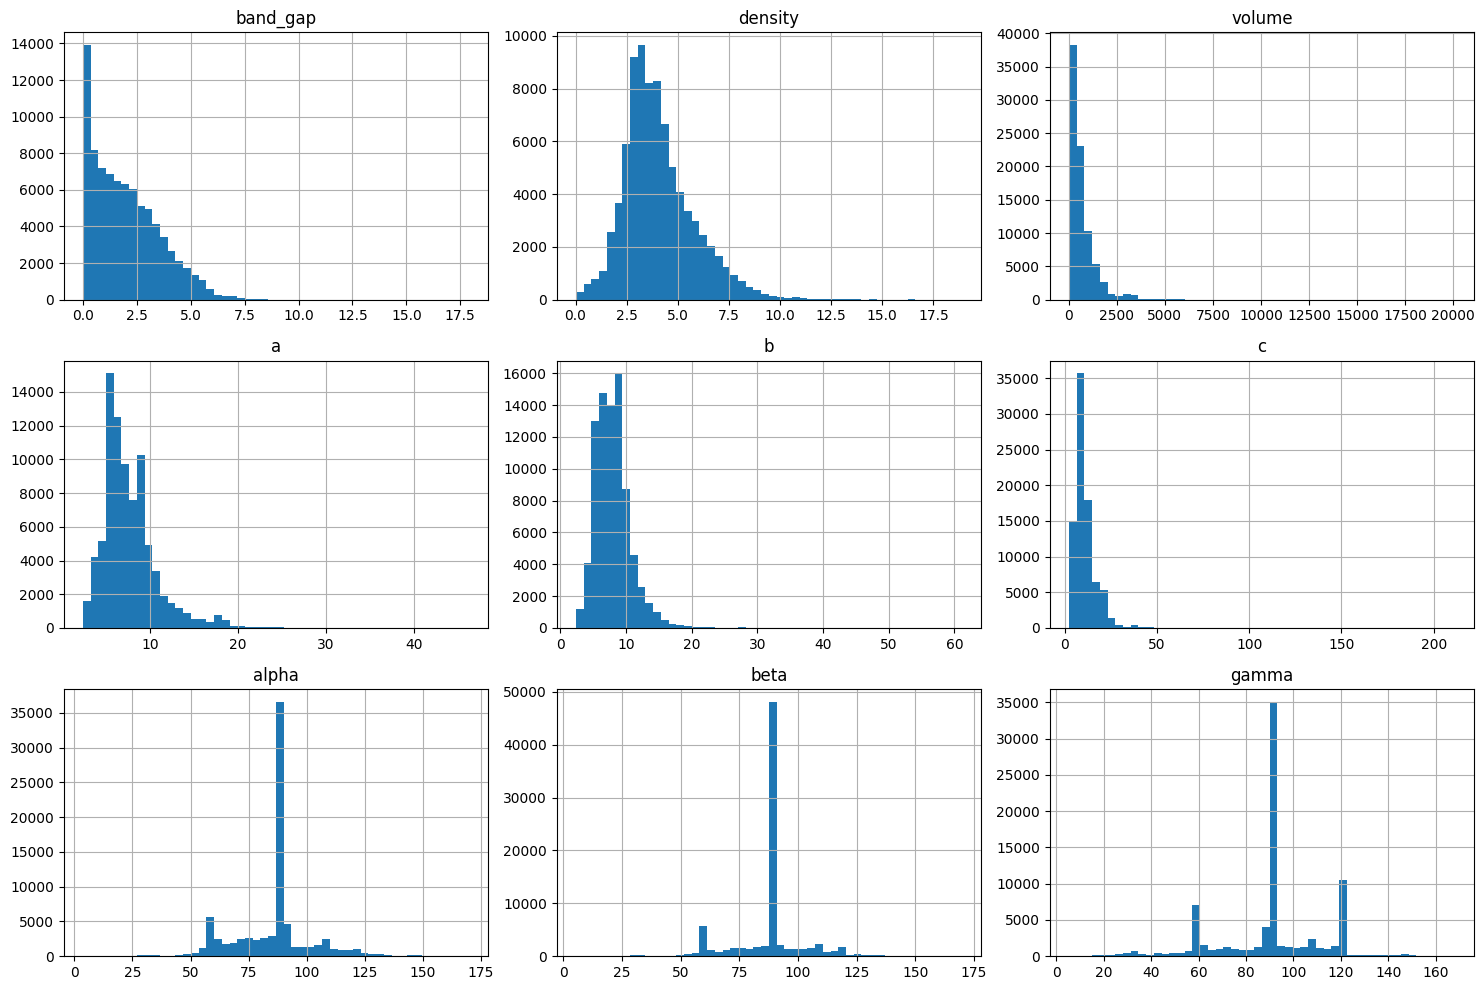

In [ ]:
numeric_features = ["band_gap", "density", "volume", "a", "b", "c", "alpha", "beta", "gamma"]
df[numeric_features].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

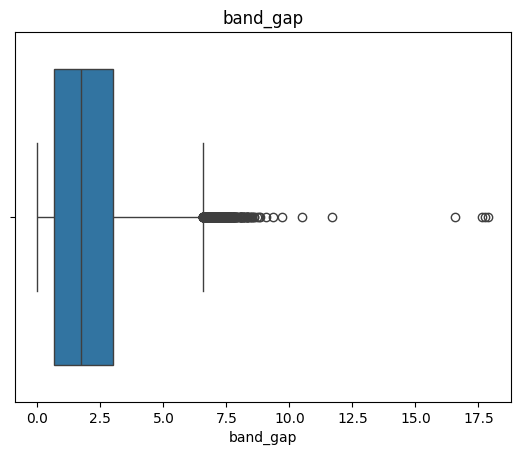

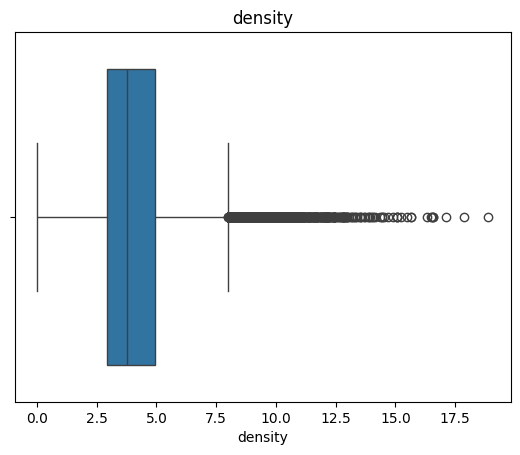

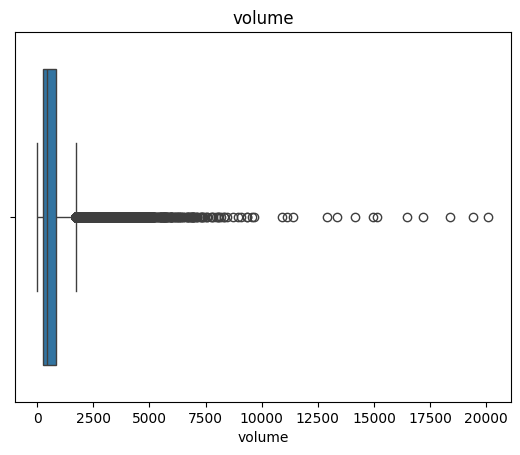

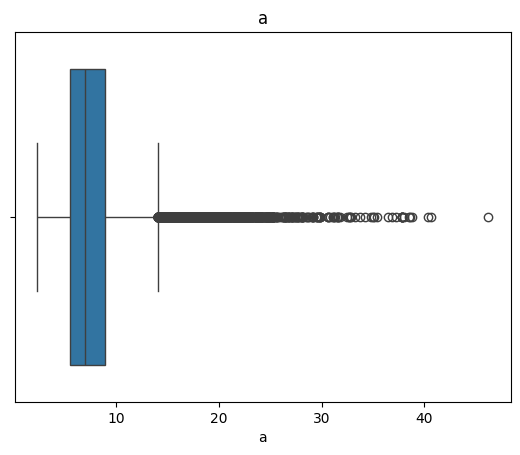

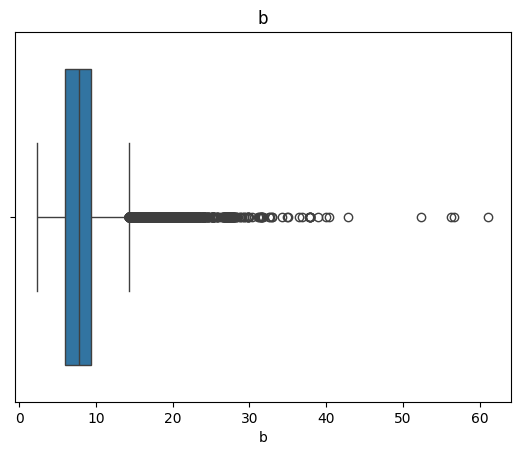

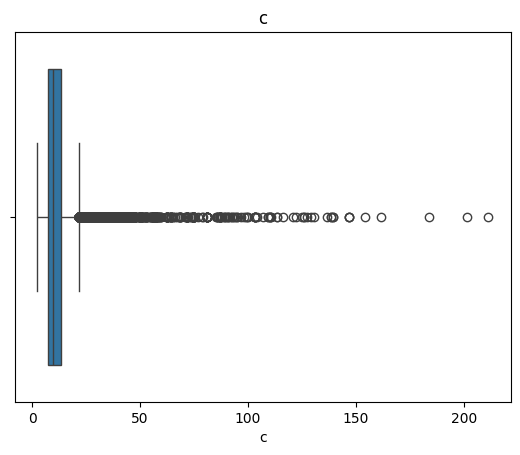

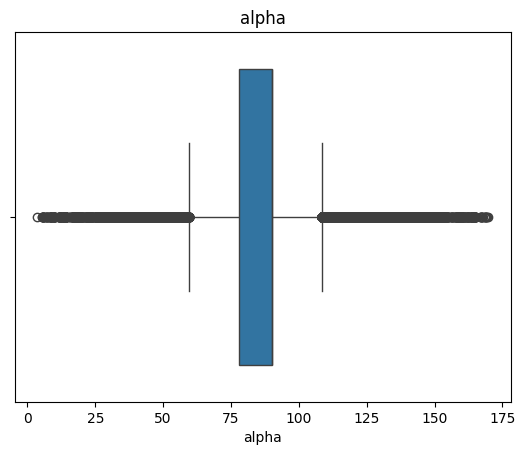

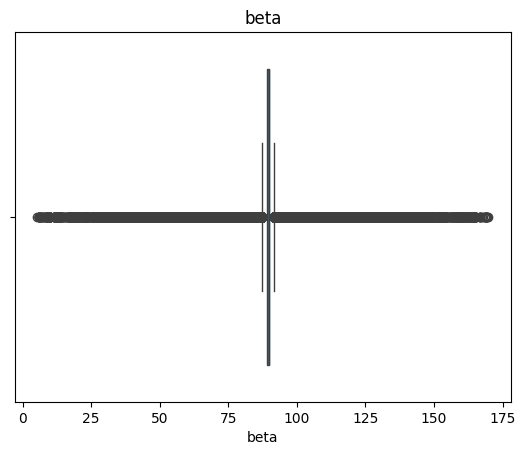

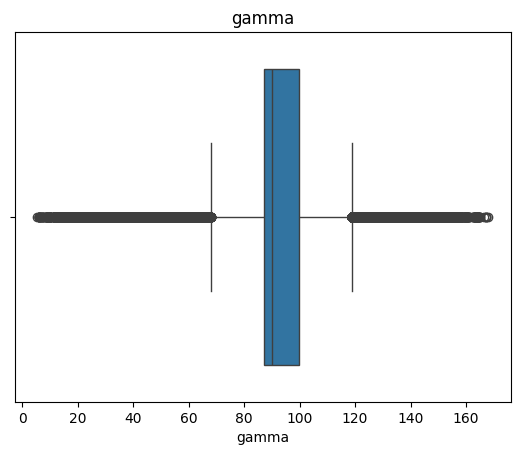

In [ ]:
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[df["band_gap"] <= 1]

sns.histplot(filtered_df["band_gap"], bins=100, kde=True)
plt.title("Band Gap Distribution (0–1 eV)")
plt.xlabel("eV")
plt.ylabel


KeyError: "None of [Index([  3.522599999999999,              2.2962,              3.0275,\n       0.07939999999999901,              4.1024,              0.8071,\n         4.103299999999999,               4.241,              5.0865,\n                    4.4451,\n       ...\n                       0.0,                 0.0,                 0.0,\n                       0.0,                 0.0,                 0.0,\n                       0.0,                 0.0,                 0.0,\n                       0.0],\n      dtype='float64', length=82998)] are in the [columns]"

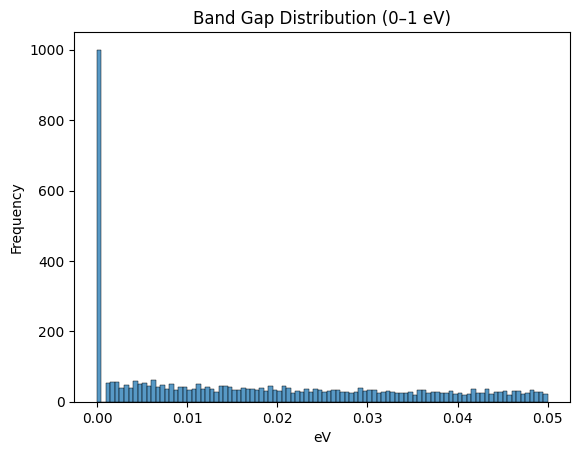

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df2 = df[df["band_gap"] <= .05]

sns.histplot(filtered_df2["band_gap"], bins=100)
plt.title("Band Gap Distribution (0–1 eV)")
plt.xlabel("eV")
plt.ylabel("Frequency")
plt.show()


##### Target (band gap) distribution

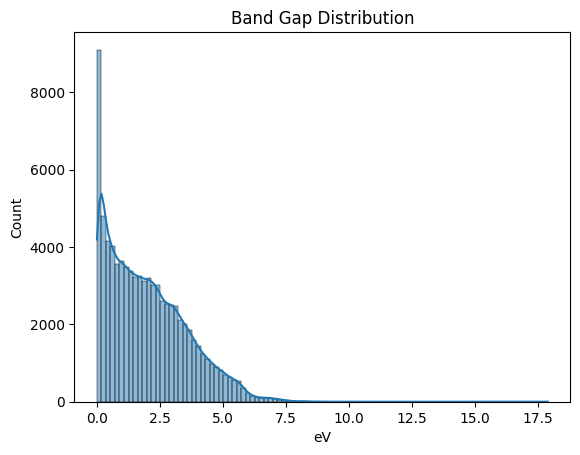

In [8]:
sns.histplot(df["band_gap"], bins=100, kde=True)
plt.title("Band Gap Distribution")
plt.xlabel("eV")
plt.show()

##### Correlation Matrix

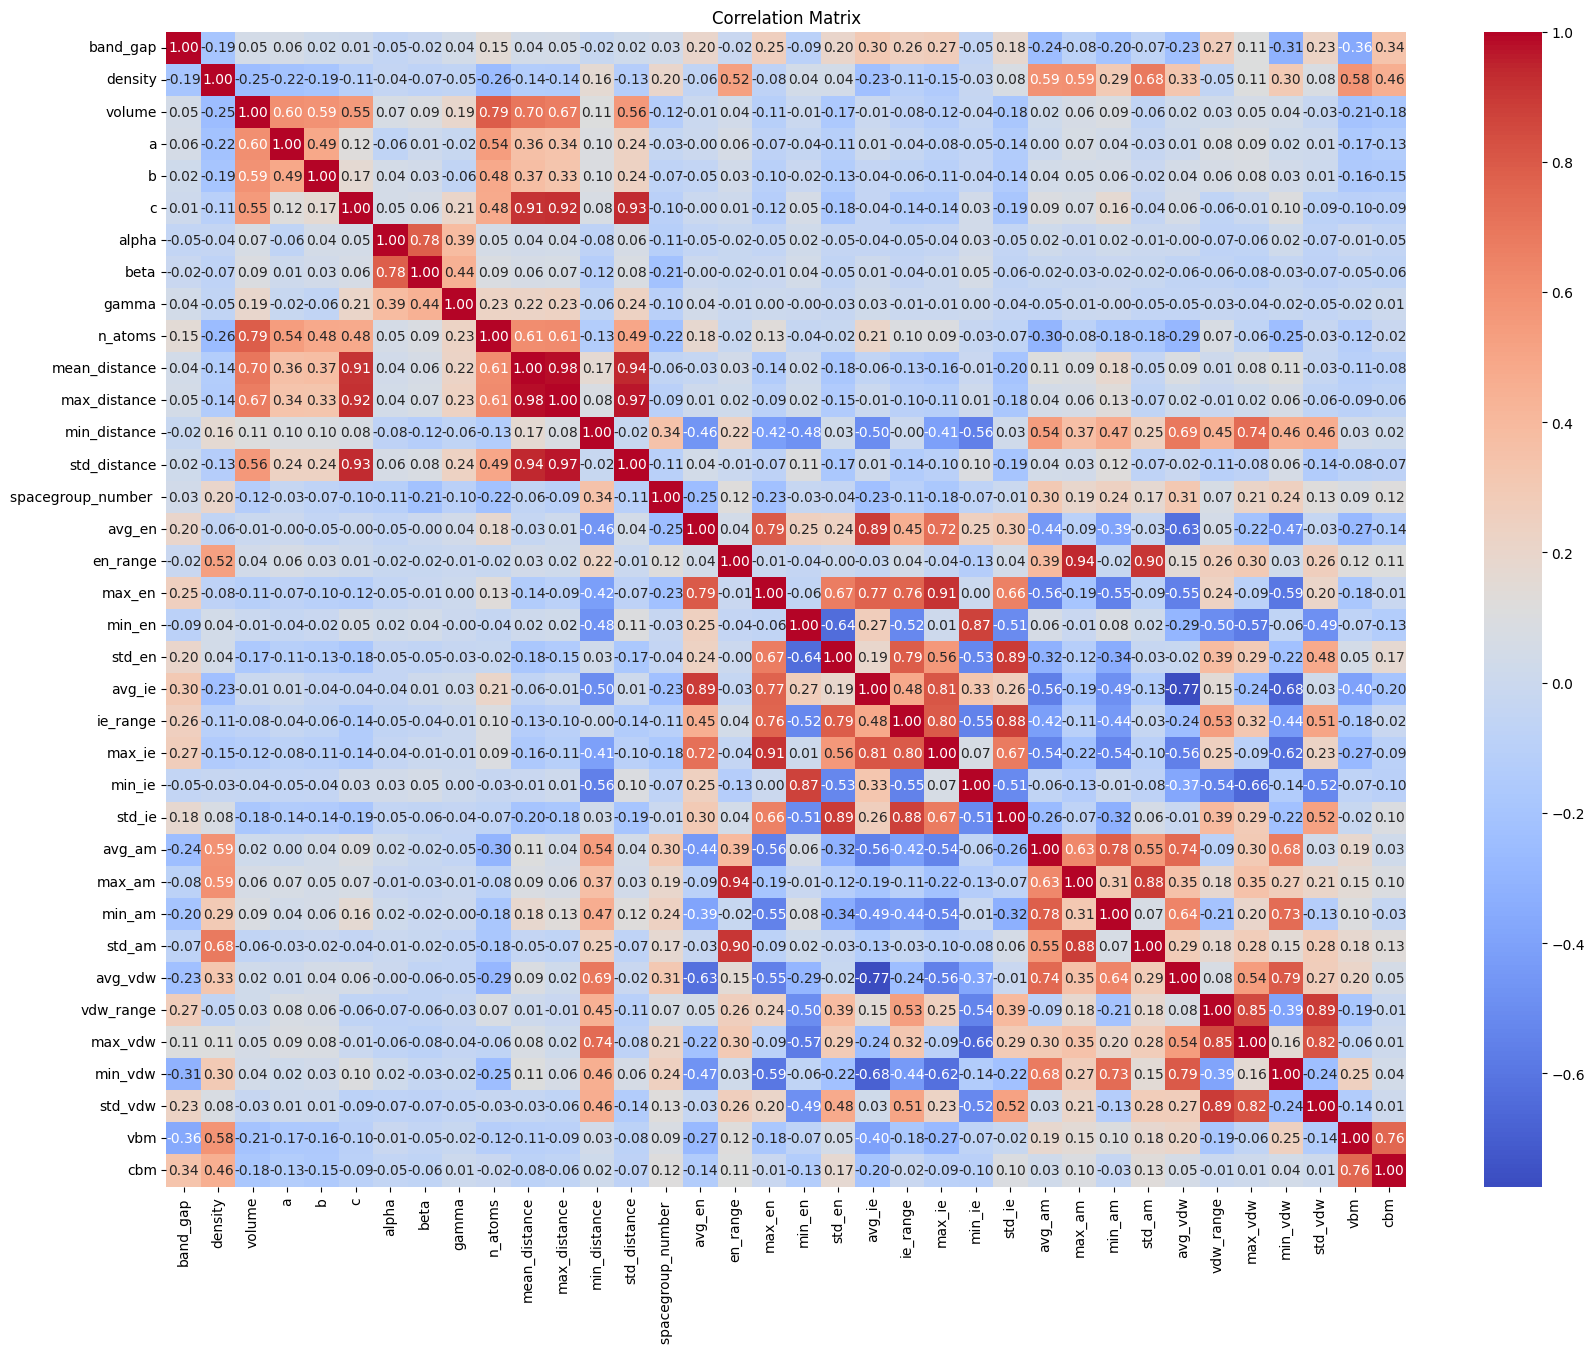

82998

In [12]:

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
len(df)

In [62]:
df_filter = df[df['spacegroup_number '] == number]
correlation_matrix = df_filter.corr(numeric_only=True)
first_column = correlation_matrix['band_gap'] # Assuming 'band_gap' is the first column
first_column_abs = np.abs(first_column)
first_column_abs

,band_gap
band_gap,1.000000
density,0.481557
volume,0.135935
a,0.106723
b,0.106724
c,0.106725
alpha,0.182249
beta,0.182247
gamma,0.082445
n_atoms,0.430951


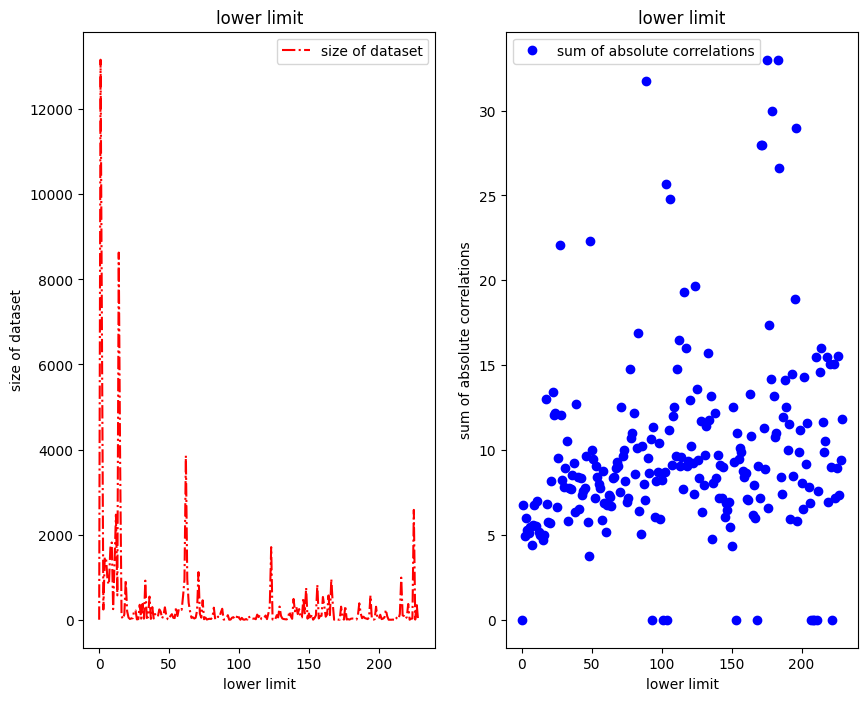

[0, 13164, 6780, 240, 1471, 1415, 905, 831, 1688, 1815, 248, 1393, 2470, 572, 8630, 3693, 83, 19, 128, 934, 200, 50, 17, 31, 36, 214, 219, 7, 15, 351, 26, 371, 25, 919, 41, 60, 544, 20, 296, 28, 134, 77, 75, 242, 191, 31, 107, 292, 97, 14, 5, 91, 130, 46, 38, 290, 86, 259, 256, 234, 558, 935, 3855, 951, 397, 196, 43, 57, 29, 45, 215, 1119, 143, 48, 457, 12, 51, 4, 16, 22, 17, 57, 283, 3, 26, 73, 56, 171, 258, 3, 9, 28, 107, 0, 4, 47, 60, 15, 22, 121, 45, 0, 44, 4, 1, 15, 3, 84, 19, 31, 25, 28, 11, 120, 62, 115, 15, 14, 46, 99, 14, 149, 322, 1707, 5, 35, 16, 107, 54, 309, 93, 28, 16, 11, 7, 27, 192, 83, 21, 489, 197, 302, 132, 251, 48, 54, 507, 150, 751, 25, 146, 11, 121, 1, 40, 103, 823, 30, 88, 91, 535, 319, 71, 123, 571, 108, 956, 395, 0, 21, 8, 2, 2, 307, 71, 2, 324, 5, 14, 2, 23, 28, 27, 2, 3, 96, 386, 152, 36, 71, 38, 28, 15, 57, 569, 8, 2, 12, 305, 34, 22, 117, 14, 26, 53, 234, 79, 0, 0, 0, 3, 0, 60, 30, 13, 133, 990, 103, 87, 19, 64, 370, 0, 23, 29, 2582, 4, 394, 10, 44]
[np.flo

In [64]:
sum_correlations = []
size_dataset = []
lowerlimits = [0,0.01,0.05, 0.1, 0.5, 0.75, 1, 1.5, 2, 3, 4]
for number in range(0,230):
  df_filter = df[df['spacegroup_number '] == number].corr(numeric_only=True)
  df_filter = df[df['spacegroup_number '] == number]
  correlation_matrix = df_filter.corr(numeric_only=True)
  first_column = correlation_matrix['band_gap'] # Assuming 'band_gap' is the first column
  first_column_abs = np.abs(first_column)
  sum_correlations.append(np.sum(first_column_abs))
  size_dataset.append(len(df_filter))

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(0,230), size_dataset, '-.r')
plt.xlabel("lower limit")
plt.ylabel("size of dataset")
plt.title("lower limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(range(0,230), sum_correlations, 'ob')
plt.xlabel("lower limit")
plt.ylabel("sum of absolute correlations")
plt.title("lower limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)

In [68]:
df_221 = df[df["spacegroup_number "] == 221]

In [75]:
df_221_5_atoms = df_221[df_221["n_atoms"] == 5]

In [77]:
len(df_221_5_atoms) / len(df_221)

0.6108108108108108

In [78]:
df_221_5_atoms

,material_id,band_gap,formula,density,volume,a,b,c,alpha,beta,...,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm,bulk_modulus,shear_modulus
4,mp-1183115,4.1024,AcAlO3,8.728230,57.451413,3.858634,3.858634,3.858634,90.000000,90.0,...,83.410543,1.774,0.95,2.47,1.52,0.369410,6.8036,10.9060,None,None
5,mp-1183052,0.8071,AcBO3,9.206879,51.548126,3.721668,3.721668,3.721668,90.000000,90.0,...,84.942852,1.790,0.95,2.47,1.52,0.373631,6.8964,7.7035,None,None
10,mp-866101,2.0031,AcCrO3,8.848788,61.362845,3.944287,3.944302,3.944272,90.000000,90.0,...,81.994491,1.818,0.95,2.47,1.52,0.387319,6.2536,8.2567,None,None
13,mp-861502,0.9888,AcFeO3,8.889999,61.797311,3.953570,3.953568,3.953585,90.000092,90.0,...,81.883041,1.814,0.95,2.47,1.52,0.384895,6.4987,7.4875,None,None
14,mp-1183053,2.8959,AcGaO3,9.314495,61.455078,3.946262,3.946262,3.946262,90.000000,90.0,...,81.721109,1.780,0.95,2.47,1.52,0.370675,5.2860,8.1819,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82163,mp-1183145,0.0000,AcPdO3,9.497547,66.686674,4.055208,4.055207,4.055206,90.000000,90.0,...,83.097762,1.826,0.95,2.47,1.52,0.392612,NaN,NaN,None,None
82175,mp-1183150,0.0000,AcSiO3,8.042346,62.579048,3.970175,3.970175,3.970175,90.000000,90.0,...,83.323216,1.826,0.95,2.47,1.52,0.392612,NaN,NaN,None,None
82185,mp-865927,0.0000,AcTiO3,8.403353,63.799570,3.995820,3.995820,3.995820,90.000000,90.0,...,82.145973,1.828,0.95,2.47,1.52,0.394025,NaN,NaN,"{'voigt': 179.412, 'reuss': 179.412, 'vrh': 17...","{'voigt': 80.17, 'reuss': 73.87, 'vrh': 77.02}"
82190,mp-1183168,0.0000,AcVO3,8.663746,62.471313,3.967894,3.967897,3.967894,90.000000,90.0,...,82.030045,1.820,0.95,2.47,1.52,0.388587,NaN,NaN,None,None


In [ ]:
221, number of atoms, only those with more than 45 atoms in unit cell

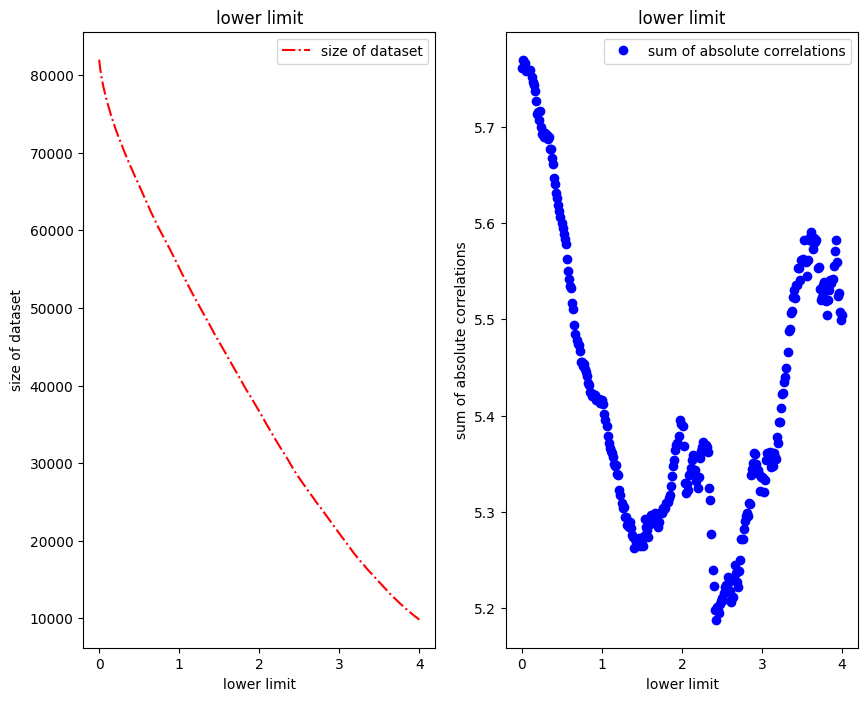

[81988, 80797, 79881, 79151, 78453, 77857, 77318, 76764, 76285, 75800, 75333, 74866, 74438, 74036, 73597, 73178, 72797, 72426, 72071, 71717, 71355, 70990, 70648, 70309, 69973, 69651, 69294, 68970, 68648, 68335, 68017, 67725, 67397, 67083, 66768, 66484, 66198, 65884, 65572, 65271, 64947, 64639, 64290, 63989, 63675, 63366, 63082, 62779, 62469, 62177, 61877, 61602, 61323, 61021, 60740, 60446, 60187, 59913, 59660, 59397, 59156, 58900, 58656, 58386, 58135, 57866, 57580, 57292, 57043, 56767, 56464, 56201, 55912, 55646, 55345, 55078, 54798, 54518, 54243, 53995, 53743, 53459, 53193, 52953, 52674, 52389, 52130, 51877, 51652, 51387, 51136, 50853, 50610, 50337, 50102, 49841, 49612, 49375, 49112, 48868, 48598, 48346, 48114, 47865, 47598, 47351, 47095, 46821, 46581, 46341, 46099, 45872, 45621, 45397, 45143, 44898, 44656, 44413, 44167, 43908, 43663, 43430, 43206, 42977, 42709, 42468, 42232, 41994, 41745, 41531, 41275, 41027, 40777, 40524, 40267, 40026, 39779, 39534, 39314, 39099, 38875, 38643, 38425

In [67]:
sum_correlations = []
size_dataset = []
lowerlimits = np.linspace(0.001, 4, 300)
for limit in lowerlimits:
  dflimit = df.copy()[df["band_gap"] > limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(lowerlimits, size_dataset, '-.r')
plt.xlabel("lower limit")
plt.ylabel("size of dataset")
plt.title("lower limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(lowerlimits, sum_correlations, 'ob')
plt.xlabel("lower limit")
plt.ylabel("sum of absolute correlations")
plt.title("lower limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)


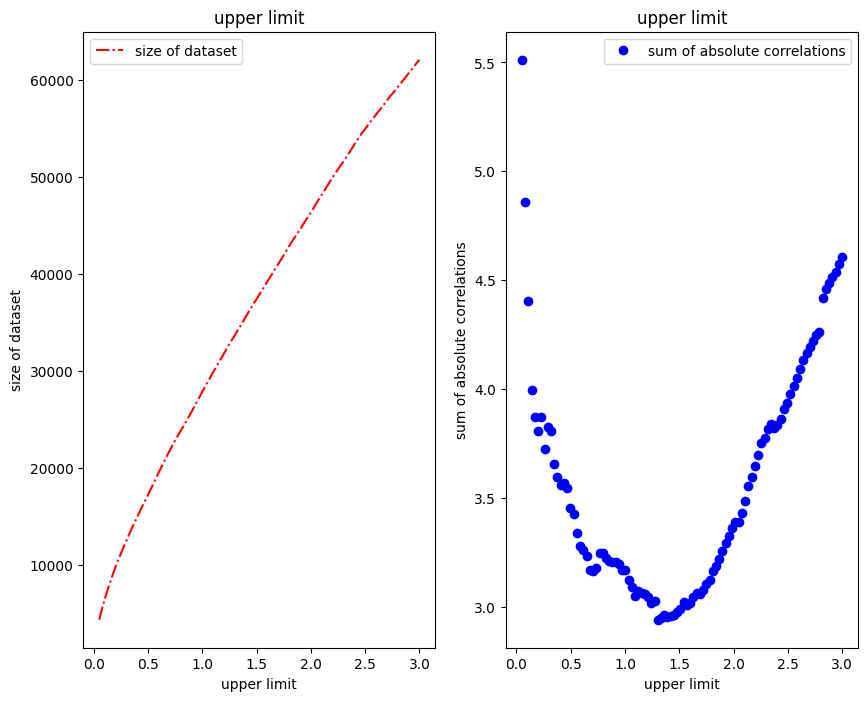

[4330, 5615, 6766, 7812, 8779, 9735, 10580, 11376, 12167, 12918, 13683, 14409, 15089, 15817, 16454, 17142, 17825, 18529, 19243, 19914, 20587, 21255, 21890, 22526, 23122, 23702, 24238, 24822, 25431, 26034, 26663, 27283, 27906, 28522, 29089, 29711, 30291, 30884, 31431, 32018, 32614, 33158, 33693, 34271, 34810, 35382, 35950, 36510, 37055, 37562, 38114, 38645, 39204, 39731, 40282, 40823, 41335, 41890, 42441, 42994, 43528, 44024, 44527, 45052, 45577, 46094, 46620, 47184, 47731, 48244, 48773, 49316, 49849, 50350, 50846, 51336, 51807, 52319, 52855, 53380, 53891, 54395, 54840, 55282, 55727, 56146, 56593, 56997, 57431, 57894, 58319, 58692, 59112, 59546, 59963, 60381, 60810, 61234, 61654, 62065]
[np.float64(5.512451272252581), np.float64(4.857939051767603), np.float64(4.402704316112893), np.float64(3.99782558558673), np.float64(3.8697474242295336), np.float64(3.8059388908903027), np.float64(3.8736617025866598), np.float64(3.726693230015059), np.float64(3.8246438956785576), np.float64(3.807249545

In [ ]:
sum_correlations = []
size_dataset = []
upperlimit = np.linspace(0.05, 4, 100)
for limit in upperlimit:
  dflimit = df.copy()[df["band_gap"] < limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(upperlimit, size_dataset, '-.r')
plt.xlabel("upper limit")
plt.ylabel("size of dataset")
plt.title("upper limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(upperlimit, sum_correlations, 'ob')
plt.xlabel("upper limit")
plt.ylabel("sum of absolute correlations")
plt.title("upper limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)


# Correlation from subset bandgap larger than .5


In [ ]:
# BandGaps larger then .1

df2 = df.copy()[df["band_gap"] > .5]
len(df2)

65786

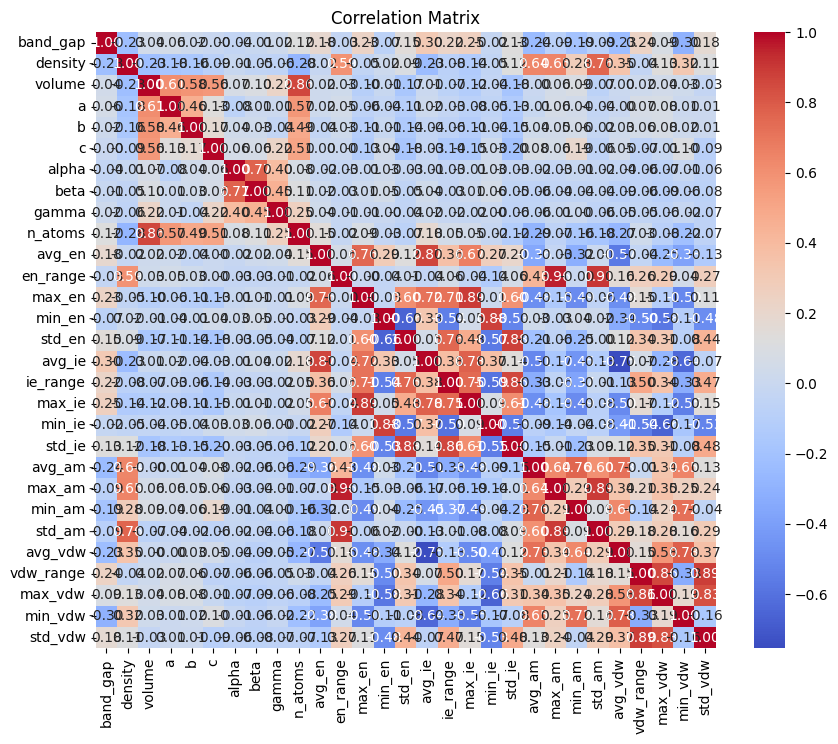

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap larger than 1

In [ ]:
# Correlation from subset bandgap larger than 1
df3 = df.copy()[df["band_gap"] > 1]
len(df3)

55163

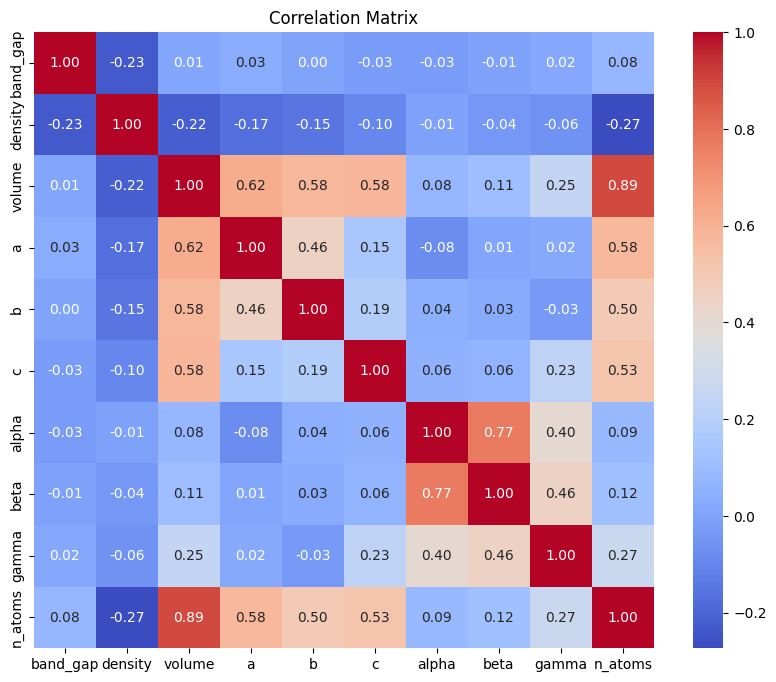

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap larger than 5

In [ ]:
# Correlation from subset bandgap larger than 5
df4 = df.copy()[df["band_gap"] > 5]
len(df4)

3892

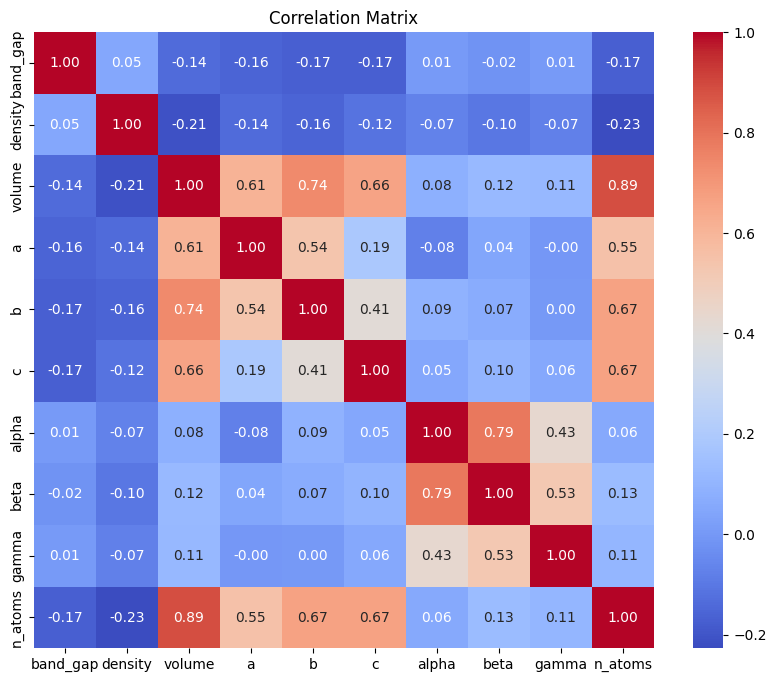

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap smaller than 2

In [ ]:
# Correlation from subset bandgap smaller than 2
df5 = df.copy()[df["band_gap"] < 2]
len(df5)

46320

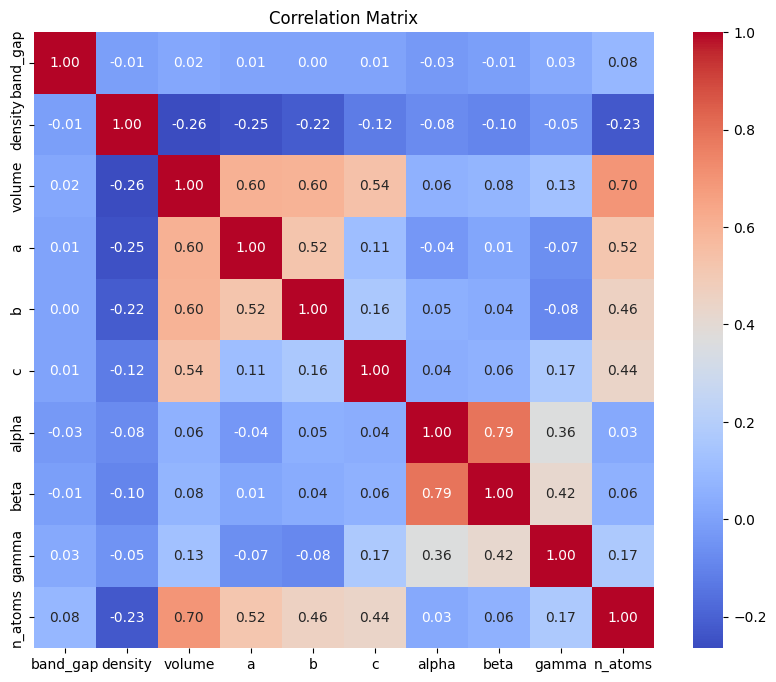

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df5.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

We see that there is more correlation between bandgao and other parameters when taking a smaller subset, filtering on bandgaps. Interesting to look at spacegroups how these influence correlations.